# Compute Squared Euclidean Distance

This function have the following cost:
* adds: $D \cdot N (N-1)$
* mults: $\frac{1}{2}D \cdot N (N-1)$
* total: $\frac{3}{2}D \cdot N (N-1)$

So:
$$W = \frac{3}{2}D \cdot N (N-1)\quad flops$$

The memory traffic is computed taking into account that there is warm cache (on the previous step the whole input matrix have been accessed so it should be in cache):
$$Q = 4 \cdot N * N$$

And so the operational intensity is:
$$I \approxeq \frac{3}{8} * D = \frac{3}{8} * 28 \times 28 = 294$$

The computation will be **compute bound**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from visualization import plot

mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

In [2]:
# Define fixed variables of the problem
D = 28*28
d = 2
T = 1000

Lets define the flops depending on the input size.

In [3]:
def get_flops(N):
    W = 3/2 * D * N * (N - 1)
    return W

Lets import the runtime of each function.

In [4]:
data = pd.read_csv("./bench1.csv")
data

,N,Base Version,compute_squared_euclidean_distance
0,200,8.793543e+07,8.791784e+07
1,400,3.549072e+08,3.527219e+08
2,600,7.996265e+08,7.943000e+08
3,800,1.415775e+09,1.426638e+09
4,1000,2.218984e+09,2.543475e+09
5,1200,3.208744e+09,3.219468e+09
6,1400,3.776048e+09,3.158195e+09
7,1600,4.076754e+09,4.077451e+09
8,1800,5.106434e+09,5.134369e+09
9,2000,6.371876e+09,6.355630e+09


In [5]:
# Extract the input size
N = data["N"].as_matrix()

In [6]:
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

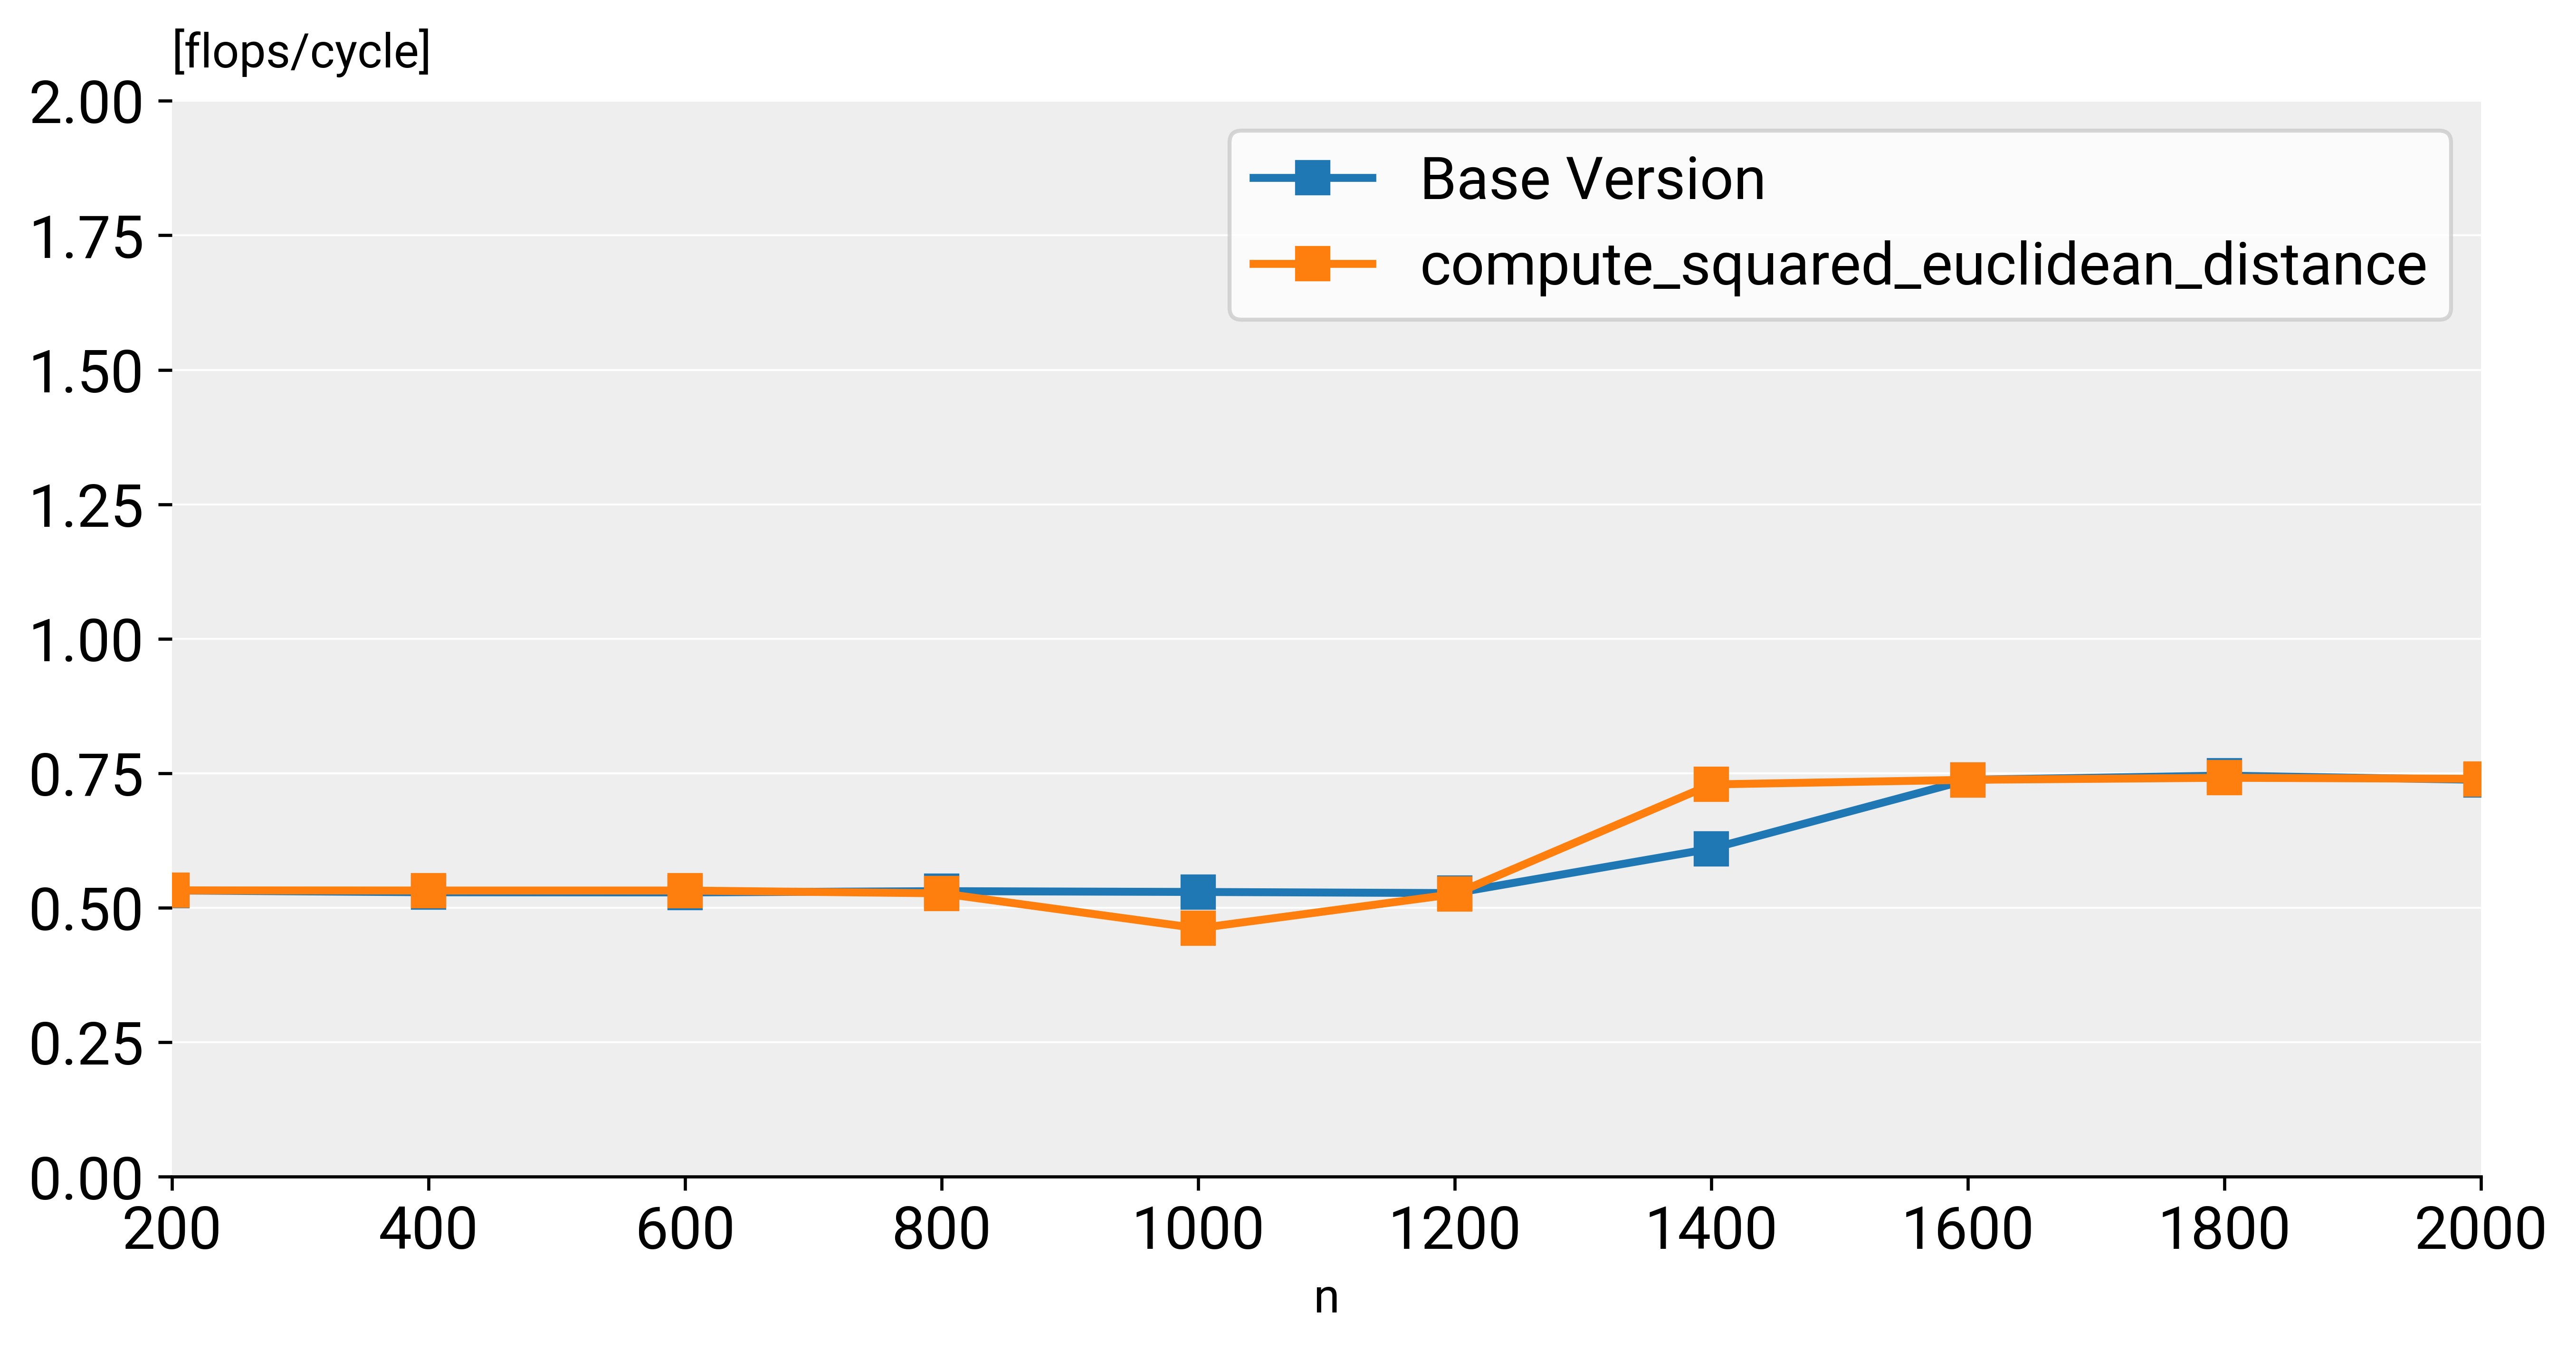

In [7]:
plot(N, perf, labels=func_names)
plt.show()